In [1]:
import ase
import numpy as np
from numpy.linalg import norm, svd
from ase.visualize import view
import struct_statistics as stats
import matplotlib.pyplot as p
import soaputils as su
import soaplite
import genBasis
%matplotlib

Using matplotlib backend: TkAgg


In [2]:
rCut = 10.0
NradBas = 5
Lmax = 5
myAlphas, myBetas = genBasis.getBasisFunc(rCut, NradBas)

struct0 = ase.io.read("res_structs/dump_50A.cfg")
struct0s = struct0.copy()
struct0s.set_cell((15,15,15))
struct0s = su.limit_pos(struct0s)
print(struct0s.get_cell())
print(len(struct0s.get_chemical_symbols()))
view(struct0s)

Cell([15.0, 15.0, 15.0], pbc=True)
197


In [3]:
structr = su.ran_sample(struct0,(15,15,15))
print(structr.get_cell())
print(len(structr.get_chemical_symbols()))
#structr = su.limit_pos(structr)
view(structr)

Cell([15.0, 15.0, 15.0], pbc=True)
197


In [4]:
np.random.seed(50)
def sample_vec(struct,cell,seed):
    struct = su.ran_sample(struct,cell,seed)
    n = 20
    s_norm = np.zeros(n)
    offset = np.linspace(0,9,n)
    for i in np.arange(n):
        struct_off = struct.copy()
        pos = struct_off.get_positions()
        shape = pos.shape
        #s = np.zeros(N)
        ran_pos = (np.random.random_sample(shape)-0.5)*2*offset[i]
        pos += ran_pos
        struct.set_positions(pos)
        struct.wrap(pbc=(1,1,1)) # atoms are wrapped inside unit cell to prevent atoms going outside of it
        mat = soaplite.get_periodic_soap_structure(struct_off, myAlphas, myBetas, rCut, NradBas, Lmax)
        s = svd(mat.transpose(), full_matrices=False, compute_uv=False)
        s_norm[i] = norm(s, ord=1)/norm(s)
    return s_norm

step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19


Text(0, 0.5, 'l1/l2 metric')

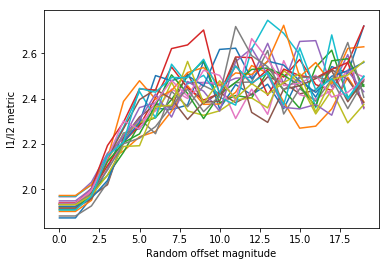

In [5]:
np.random.seed(50)
Nsamples = 20
res = np.zeros((Nsamples,20))
for i in np.arange(Nsamples):
    print('step: %i' %i)
    vec = sample_vec(struct0, (15,15,15), 50+i)
    res[i] = vec
    p.plot(vec)
p.xlabel('Random offset magnitude')
p.ylabel('l1/l2 metric')

Text(0, 0.5, 'mean l1/l2 metric')

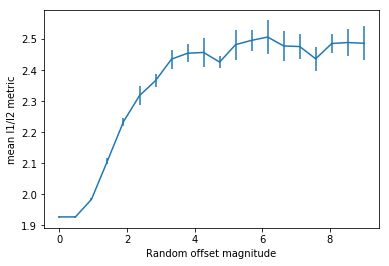

In [8]:
var = np.var(res, 0)
mean = np.mean(res, 0)
n = 20
offset = np.linspace(0,9,n)
p.errorbar(x=offset, y=mean, yerr=5*var)
p.xlabel('Random offset magnitude')
p.ylabel('mean l1/l2 metric')

step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19


Text(0, 0.5, 'l1/l2 metric')

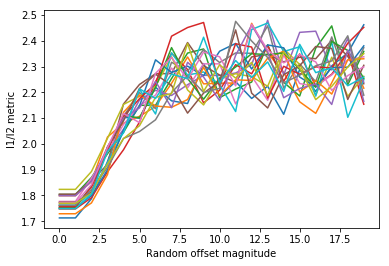

In [9]:
structr = struct0.copy()
nums = structr.get_atomic_numbers()
nums = [1 if i==3 else i for i in nums]
structr.set_atomic_numbers(nums)
#view(structr)

np.random.seed(50)
Nsamples = 20
res = np.zeros((Nsamples,20))
for i in np.arange(Nsamples):
    print('step: %i' %i)
    vec = sample_vec(structr, (15,15,15), 50+i)
    res[i] = vec
    p.plot(vec)
p.xlabel('Random offset magnitude')
p.ylabel('l1/l2 metric')

step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19


Text(0, 0.5, 'l1/l2 metric')

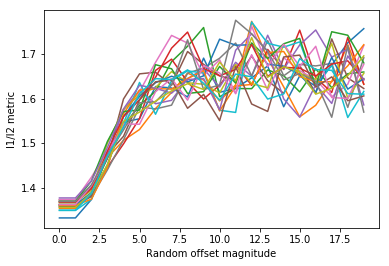

In [10]:
structr = struct0.copy()
nums = structr.get_atomic_numbers()
nums = [1 for i in nums]
structr.set_atomic_numbers(nums)
#view(structr)

np.random.seed(50)
Nsamples = 20
res = np.zeros((Nsamples,20))
for i in np.arange(Nsamples):
    print('step: %i' %i)
    vec = sample_vec(structr, (15,15,15), 50+i)
    res[i] = vec
    p.plot(vec)
p.xlabel('Random offset magnitude')
p.ylabel('l1/l2 metric')

step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19


Text(0, 0.5, 'l1/l2 metric')

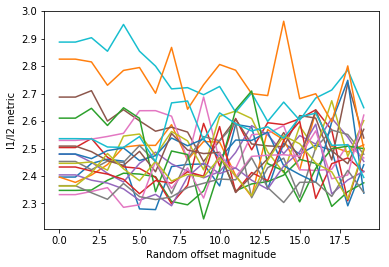

In [18]:
struct = su.rand_pos(struct0)

np.random.seed(50)
Nsamples = 20
res = np.zeros((Nsamples,20))
for i in np.arange(Nsamples):
    print('step: %i' %i)
    vec = sample_vec(struct, (15,15,15), 50+i)
    res[i] = vec
    p.plot(vec)
p.xlabel('Random offset magnitude')
p.ylabel('l1/l2 metric')